In [1]:
import numpy as np                        # Math
import scipy.stats                        # Statistics
from matplotlib import pyplot as plt      # Plots
from scipy.stats import norm

### Part 1

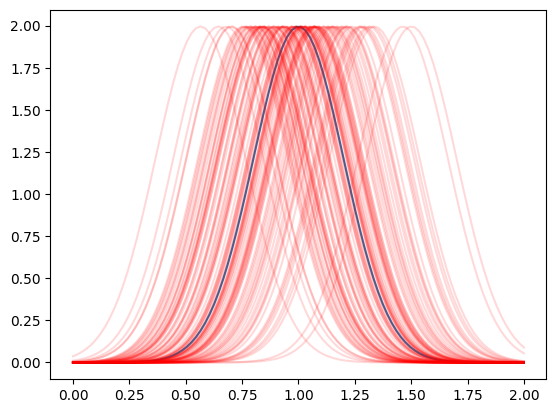

In [2]:
mean = 1
sigma = 0.2
N = 100
logsum = np.zeros(N)

R = np.random.normal(loc=mean, scale=sigma, size=N)

gauss = norm(loc=mean, scale=sigma)
mu_proposed = np.linspace(0,2,N)

plt.plot(mu_proposed, gauss.pdf(mu_proposed))

#print(R)

for i in range(N):
    gaussR = norm(loc=R[i],scale=sigma)
    plt.plot(mu_proposed, gaussR.pdf(np.linspace(0,2,N)), color="red", alpha=0.15)
    logsum = logsum + np.log(gaussR.pdf(np.linspace(0,2,N)))  

plt.show()

0.98989898989899


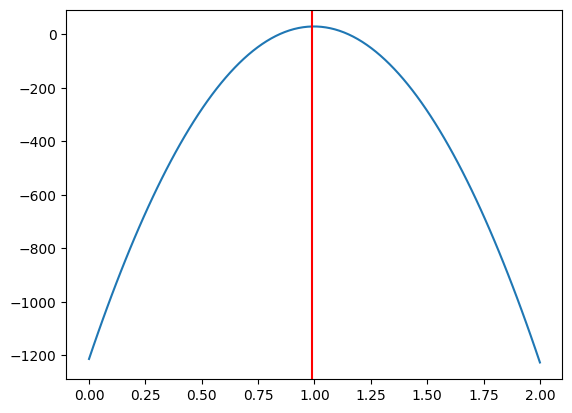

In [3]:
plt.plot(mu_proposed, logsum)
# sull'asse delle x c'è il parametro (il mu che voglio stimare)

findmax = mu_proposed[np.argmax(logsum)]
print(findmax)
plt.axvline(findmax,c='red')
plt.show()

0.98989898989899


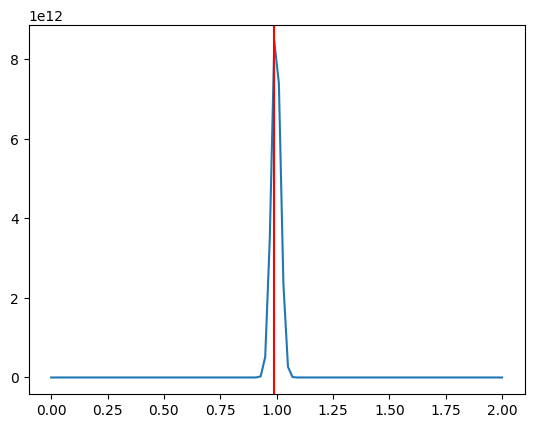

In [4]:
plt.plot(mu_proposed, np.exp(logsum))
# sull'asse delle x c'è il parametro (il mu che voglio stimare)

findmax = mu_proposed[np.argmax(np.exp(logsum))]
index_max = np.argmax(np.exp(logsum))

print(findmax)
plt.axvline(findmax,c='red')
plt.show()

In [5]:
par = findmax

par_MLE = np.sum(mu_proposed)/N
err_MLE = sigma/np.sqrt(N)

print("parameter:", par, par_MLE)
print("error:", np.abs(par-par_MLE), err_MLE)

parameter: 0.98989898989899 1.0
error: 0.010101010101010055 0.02


### Part 2

logsum_diff = np.diff(logsum,2)
print(np.size(logsum_diff))

fisher = np.sqrt(- logsum_diff[index])


mu_center = (mu_proposed[1:] + mu_proposed[:-1]) / 2
print(mu_center)

logsum_diff = np.diff(logsum, 2)/((par-mu_center)**2)
fisher = np.sqrt(-logsum_diff)

plt.plot(mu_center, logsum_diff)
plt.show()

### Part 3

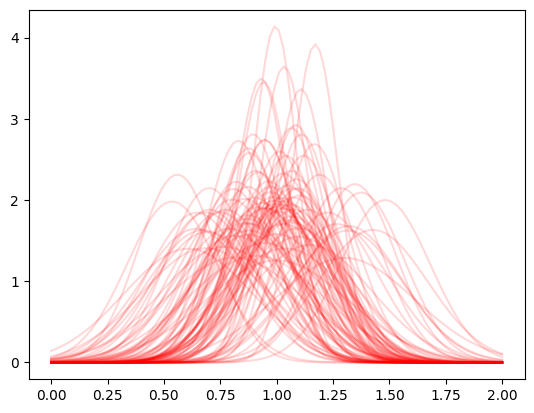

In [6]:
mean = 1
sigma_mean = 0.2

mean_sigma = 0.2
sigma_sigma = 0.05

N = 100
logsum = np.zeros(N)

sigma = np.random.normal(loc=mean_sigma, scale=sigma_sigma, size=N)


#plt.plot(mu_proposed, gauss.pdf(mu_proposed))

#print(R)

for i in range(N):
    gauss = norm(loc=mean, scale=sigma[i])
    mu_proposed = np.linspace(0,2,N)
    R = gauss.rvs(size=1)

    gaussR = norm(loc=R,scale=sigma[i])
    plt.plot(mu_proposed, gaussR.pdf(np.linspace(0,2,N)), color="red", alpha=0.15)
    logsum = logsum + np.log(gaussR.pdf(np.linspace(0,2,N)))  

plt.show()

0.98989898989899


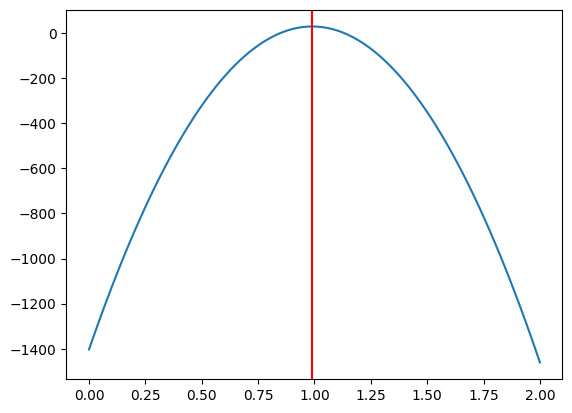

In [7]:
plt.plot(mu_proposed, logsum)
# sull'asse delle x c'è il parametro (il mu che voglio stimare)

findmax = mu_proposed[np.argmax(logsum)]
print(findmax)
plt.axvline(findmax,c='red')
plt.show()

0.98989898989899


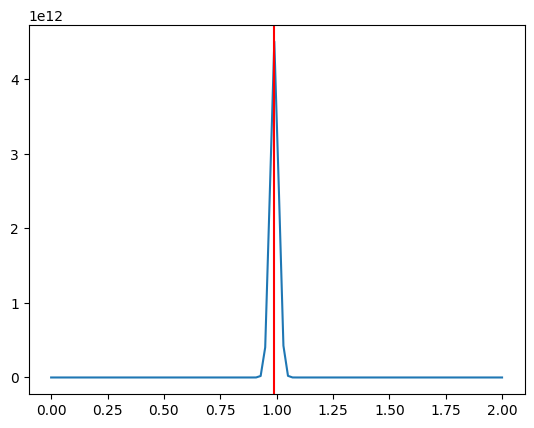

In [8]:
plt.plot(mu_proposed, np.exp(logsum))
# sull'asse delle x c'è il parametro (il mu che voglio stimare)

findmax = mu_proposed[np.argmax(np.exp(logsum))]
index_max = np.argmax(np.exp(logsum))

print(findmax)
plt.axvline(findmax,c='red')
plt.show()

In [9]:
par = findmax

par_MLE = np.sum(mu_proposed / sigma**2) / np.sum(sigma**(-2))
err_MLE = np.sum(sigma**(-2))**(-0.5)

print("parameter:", par, par_MLE)
print("error:", np.abs(par-par_MLE), err_MLE)

parameter: 0.98989898989899 1.0339296188340816
error: 0.04403062893509169 0.018499840182327604
